In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
dfy = pd.read_csv("/content/drive/MyDrive/Office/rnd/SSv4/data/y.csv", index_col=0)
dfx = pd.read_excel("/content/drive/MyDrive/Office/rnd/SSv4/data/compsaa_file2_20200701_20201231.xlsx")
# dfx_no_null = pd.read_excel("/content/drive/MyDrive/Office/rnd/SSv4/data/compsaa_file2_20200701_20201231.xlsx").loc[lambda d: d.total_comment_num.notnull()]

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
dfy.head()

,date_time,product_name,sku,brand,deal_num,to_cart_num
0,2020-01-01,美素佳儿（Friso）儿童配方奶粉 4段（3岁以上至6岁适用）900克（荷兰原装进口）,100004774814,美素佳儿（Friso）,0,4
1,2020-01-01,美素佳儿（Friso Prestige）皇家儿童配方奶粉 4段（3岁以上至6岁适用） 800...,100006224968,美素佳儿（Friso）,0,3
2,2020-01-01,美素力（Frisolac Prestige）皇家婴儿配方奶粉 1段（0-6个月婴儿适用） 4...,100007187818,美素佳儿（Friso）,0,3
3,2020-01-01,美素佳儿（Friso）较大婴儿配方奶粉 2段（6-12个月婴幼儿适用）1200克（荷兰原装进口）,100004188413,美素佳儿（Friso）,0,5
4,2020-01-01,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（新客礼）,100003754072,美素佳儿（Friso）,0,2


In [ ]:
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0
2,10030902240475,学生牛奶粉高钙高锌900g*2罐装儿童青少年高中大学女营养成长 【送:礼袋+燕麦片1袋】学生...,NaN,NaN,NaN,20210515.0
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0


In [ ]:
dfx["date_key"] = pd.to_datetime(dfx["date_key"], format="%Y%m%d")
dfy['date_time'] =  pd.to_datetime(dfy['date_time'], infer_datetime_format=True)

In [ ]:
dfx_nocom = dfx[dfx['total_comment_num'].isna()]

In [ ]:
dfx_nocom.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
2,10030902240475,学生牛奶粉高钙高锌900g*2罐装儿童青少年高中大学女营养成长 【送:礼袋+燕麦片1袋】学生...,NaN,NaN,NaN,2021-05-15
5,56357165862,美羚德瑞兰帝婴幼儿羊奶粉1岁2岁3岁系列出口品质贴近母乳易吸收奶粉 德瑞兰帝 2段 800克,NaN,NaN,NaN,2021-05-10
6,70179074889,雅姆营养 羊奶粉3段(1-3岁幼儿适用）600g含乳铁蛋白益生菌Bb-12婴幼儿羊奶粉 #0,NaN,NaN,NaN,2020-07-09
9,100015758284,完达山（wondersun）菁润幼儿配方羊奶粉3段800g（1-3岁幼儿适用）,NaN,NaN,NaN,2020-12-11
10,10021912479763,【品质保证】 雀巢（nestle） 雀巢学生奶粉成年早餐高中生大学生成人高钙营养牛奶粉冲饮小...,NaN,NaN,NaN,2020-10-31


In [ ]:
print(len(dfx))
print(len(dfx_nocom))
print(len(dfx) - len(dfx_nocom))

1048575
666956
381619


In [ ]:
print(dfx.describe())
print("\n")
print(dfy.describe())
print("\n")
print(dfx_nocom.describe())

                sku  monthly_sales_qty  total_sales_qty  total_comment_num
count  1.048575e+06                0.0              0.0       3.816190e+05
mean   3.526079e+12                NaN              NaN       5.736469e+03
std    4.753316e+12                NaN              NaN       4.505462e+04
min    2.525910e+05                NaN              NaN       0.000000e+00
25%    4.502093e+10                NaN              NaN       1.000000e+00
50%    6.979837e+10                NaN              NaN       7.900000e+01
75%    1.002345e+13                NaN              NaN       7.140000e+02
max    1.004298e+13                NaN              NaN       1.724691e+06


                sku      deal_num   to_cart_num
count  4.977541e+06  4.977541e+06  4.977541e+06
mean   7.643062e+10  4.577304e+01  1.109656e+02
std    4.245157e+10  1.946343e+02  5.334682e+02
min    2.454280e+05  0.000000e+00  0.000000e+00
25%    1.000025e+11  0.000000e+00  0.000000e+00
50%    1.000072e+11  0.000000e+00  

In [ ]:
print(dfx.info())
print("\n")
print(dfy.info())
print("\n")
print(dfx_nocom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   sku                1048575 non-null  int64         
 1   product_name       1048575 non-null  object        
 2   monthly_sales_qty  0 non-null        float64       
 3   total_sales_qty    0 non-null        float64       
 4   total_comment_num  381619 non-null   float64       
 5   date_key           1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 48.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977541 entries, 0 to 69724
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date_time     datetime64[ns]
 1   product_name  object        
 2   sku           int64         
 3   brand         object        
 4   deal_num      int64     

# 1

In [ ]:
len(dfy.loc[dfy['deal_num'] != 0])

1682480

In [ ]:
sku_overlaps = set(dfx.sku).intersection(set(dfy.sku))
print(f"unique number of sku id's across datasets = {len(sku_overlaps)}")
print(sku_overlaps)

unique number of sku id's across datasets = 187
{100013241352, 100009120272, 100018650640, 100009120274, 100007930898, 100015014422, 100021493784, 100021493786, 5105691, 100021493788, 100016053274, 100021493790, 100016053276, 100002469409, 100005273127, 100013798951, 100012808234, 5105707, 5105709, 100007030317, 100017311280, 5105713, 100016053298, 100009120308, 100005156931, 100016050756, 100003490883, 100016053316, 100016053318, 100013158474, 100015984122, 100006632531, 100007181395, 100016050774, 100017310806, 100003754072, 100011141721, 100016050778, 100007181403, 100012808284, 100016050780, 100016053342, 100003754082, 100016053346, 100016050788, 100016050792, 100020546666, 100012808302, 100012064880, 100010431601, 100012064882, 100016050802, 100005794930, 100005794932, 100014451831, 100004787831, 100014451833, 100020099194, 100020546682, 100016050812, 100020546684, 100012808318, 100005794942, 100009090177, 100026817154, 100009090183, 100016050826, 100006946955, 100010174609, 43705

In [ ]:
convert_y_dates = lambda st: dt.datetime.strptime(st, "%Y-%m-%d")
convert_x_dates = lambda i: dt.datetime.strptime( str(i), "%Y%m%d.0")

In [ ]:
dfx = dfx.assign(date_joiner_x=lambda d: d.date_key.apply(convert_x_dates))
dfy = dfy.assign(date_joiner_y=lambda d: d.date_time.apply(convert_y_dates))
# dfx_no_null = dfx_no_null.assign(date_joiner=lambda d: d.date_key.apply(convert_x_dates))

In [ ]:
df_in = dfx.loc[lambda dd: dd.loc[lambda d: d.sku.isin(sku_overlaps)]] #.total_comment_num.notnull().loc[lambda x: x].index].sku.value_counts()
df_in.head()

In [ ]:
df_in = dfx.loc[lambda d: d.sku.isin(sku_overlaps)]
df_in.info()
len(df_in.sku.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3670 entries, 28 to 1046951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                3670 non-null   int64         
 1   product_name       3670 non-null   object        
 2   monthly_sales_qty  0 non-null      float64       
 3   total_sales_qty    0 non-null      float64       
 4   total_comment_num  1422 non-null   float64       
 5   date_key           3670 non-null   float64       
 6   date_joiner        3670 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 229.4+ KB


187

In [ ]:
df_in_com = df_in.loc[lambda d: d.total_comment_num.notnull()]
df_in_com.info()
len(df_in_com['sku'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 812 to 1046951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1422 non-null   int64         
 1   product_name       1422 non-null   object        
 2   monthly_sales_qty  0 non-null      float64       
 3   total_sales_qty    0 non-null      float64       
 4   total_comment_num  1422 non-null   float64       
 5   date_key           1422 non-null   float64       
 6   date_joiner        1422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 88.9+ KB


163

In [ ]:
no_com_skus = set(df_in.sku) - (set(df_in.sku).intersection(set(df_in_com.sku)))
print(len(no_com_skus))
print(no_com_skus)

24
{100021548294, 100015639824, 100007930898, 100015014422, 100008035479, 100021493786, 100021557146, 100021493790, 100021557150, 100005273127, 100008400813, 100008813883, 100008813889, 100009088453, 100013158474, 100001222858, 100007181395, 100014047188, 100004561621, 100007181403, 100017879394, 100007931114, 100008383850, 100004787831}


In [ ]:
df_in_nocom = df_in.loc[lambda d: d.sku.isin(no_com_skus)]
df_in_nocom.info()
df_in_nocom.head()
len(df_in_nocom.sku.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 5423 to 1046375
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                110 non-null    int64         
 1   product_name       110 non-null    object        
 2   monthly_sales_qty  0 non-null      float64       
 3   total_sales_qty    0 non-null      float64       
 4   total_comment_num  0 non-null      float64       
 5   date_key           110 non-null    float64       
 6   date_joiner        110 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 6.9+ KB


24

In [ ]:
print(no_com_skus)
print(sku_overlaps)

{100021548294, 100015639824, 100007930898, 100015014422, 100008035479, 100021493786, 100021557146, 100021493790, 100021557150, 100005273127, 100008400813, 100008813883, 100008813889, 100009088453, 100013158474, 100001222858, 100007181395, 100014047188, 100004561621, 100007181403, 100017879394, 100007931114, 100008383850, 100004787831}
{100013241352, 100009120272, 100018650640, 100009120274, 100007930898, 100015014422, 100021493784, 100021493786, 5105691, 100021493788, 100016053274, 100021493790, 100016053276, 100002469409, 100005273127, 100013798951, 100012808234, 5105707, 5105709, 100007030317, 100017311280, 5105713, 100016053298, 100009120308, 100005156931, 100016050756, 100003490883, 100016053316, 100016053318, 100013158474, 100015984122, 100006632531, 100007181395, 100016050774, 100017310806, 100003754072, 100011141721, 100016050778, 100007181403, 100012808284, 100016050780, 100016053342, 100003754082, 100016053346, 100016050788, 100016050792, 100020546666, 100012808302, 1000120648

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

133
406
285
17
333
265
262
252
239
762
20
412
442
185
203
472
208
555
308
237
310
290
312
294


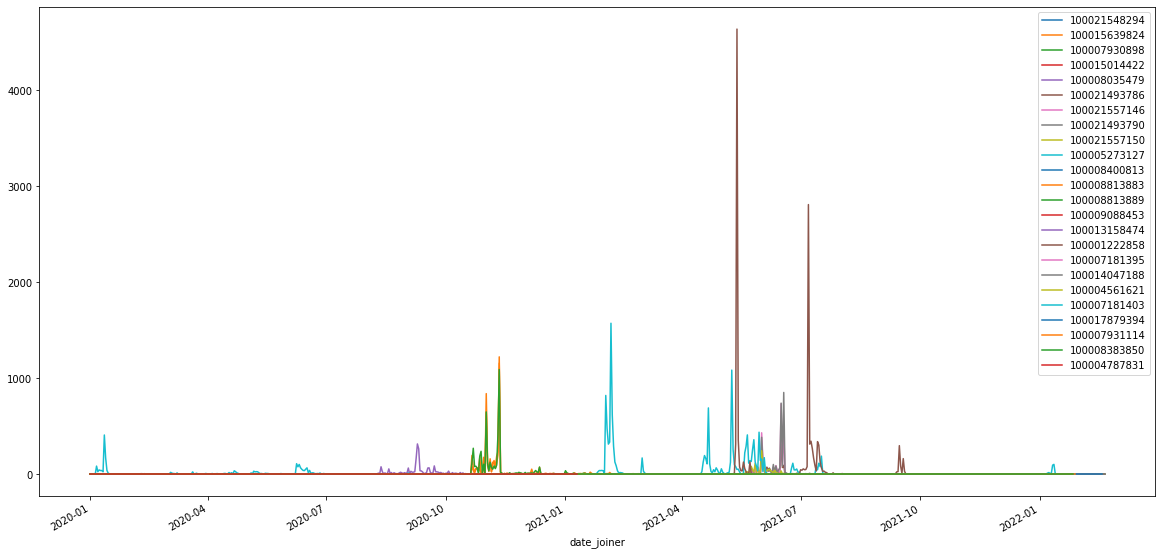

In [ ]:
for s in no_com_skus:
  p = dfy.loc[lambda d: d.sku == s].groupby(['sku', 'date_joiner'])['deal_num'].max().droplevel(0)
  p.plot()
  plt.legend(labels= no_com_skus, fontsize=10)
  # plt.pie(p)
  print(len(p))

In [ ]:
nocom_df = dfy.loc[dfy['sku'] == 100009088453]
nocom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 306296 to 69035
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     5472 non-null   object        
 1   product_name  5472 non-null   object        
 2   sku           5472 non-null   int64         
 3   brand         5472 non-null   object        
 4   deal_num      5472 non-null   int64         
 5   to_cart_num   5472 non-null   int64         
 6   date_joiner   5472 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 342.0+ KB


In [ ]:
df_m.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key,date_joiner_x,date_time,brand,deal_num,to_cart_num,date_joiner_y
0,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,NaN,2951.0,20200821.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88,2020-01-01
1,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,NaN,2951.0,20200821.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88,2020-01-01
2,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,NaN,2951.0,20200821.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88,2020-01-01
3,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,NaN,2951.0,20200821.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88,2020-01-01
4,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,NaN,2951.0,20200821.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88,2020-01-01


In [ ]:
dfx["date_key"] = pd.to_datetime(dfx["date_key"], format="%Y%m%d")
dfy['date_time'] =  pd.to_datetime(dfy['date_time'], infer_datetime_format=True)

In [ ]:
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,2021-10-05
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,2020-12-25
2,10030902240475,学生牛奶粉高钙高锌900g*2罐装儿童青少年高中大学女营养成长 【送:礼袋+燕麦片1袋】学生...,NaN,NaN,NaN,2021-05-15
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,2021-11-02
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,2021-05-08


In [ ]:
df_m = pd.merge(dfx, dfy)
df_m = df_m.drop(['monthly_sales_qty', 'total_sales_qty'], axis=1)
df_m.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
1,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
2,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
3,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
4,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88


In [ ]:
sku_uq = df_m.sku.unique().tolist()
len(sku_uq)

98

In [ ]:
type(df_m)

pandas.core.frame.DataFrame

In [ ]:
df_m2 = df_m.drop_duplicates(subset='date_key', keep='first')
df_m2.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
21828,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-08-20,2020-01-01,美素佳儿（Friso）,30,88
43656,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,1974.0,2020-07-04,2020-01-01,美素佳儿（Friso）,30,88
65484,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-07-23,2020-01-01,美素佳儿（Friso）,30,88
87312,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-09-24,2020-01-01,美素佳儿（Friso）,30,88


In [ ]:
df_m3 = df_m2.groupby(df_m2.date_key.dt.month)
df_m3.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2951.0,2020-08-21,2020-01-01,美素佳儿（Friso）,30,88
21828,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-08-20,2020-01-01,美素佳儿（Friso）,30,88
43656,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,1974.0,2020-07-04,2020-01-01,美素佳儿（Friso）,30,88
65484,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-07-23,2020-01-01,美素佳儿（Friso）,30,88
87312,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-09-24,2020-01-01,美素佳儿（Friso）,30,88
109140,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,3843.0,2020-10-09,2020-01-01,美素佳儿（Friso）,30,88
130968,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2021-02-12,2020-01-01,美素佳儿（Friso）,30,88
152796,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,7099.0,2021-05-16,2020-01-01,美素佳儿（Friso）,30,88
174624,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-10-02,2020-01-01,美素佳儿（Friso）,30,88
196452,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,NaN,2020-10-03,2020-01-01,美素佳儿（Friso）,30,88


In [ ]:
df_test = dfx.loc[dfx['sku'] == 100002005661]
df_test = df_test.sort_values(by='date_key')
df_test

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
1025280,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,73244.0,2020-07-17
873460,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-07-23
14607,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-07-30
430426,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,76216.0,2020-08-07
368526,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,77384.0,2020-08-14
855671,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-08-20
577672,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,78632.0,2020-08-21
714380,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,83520.0,2020-09-12
3286,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17
305267,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-18


In [ ]:
df_m2["total_comment_num"].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
ls = df_m3['sku'].unique().tolist()
len(ls)

11

In [ ]:
df_m3 = df_m3.sort_values(by='date_key')


AttributeError: ignored

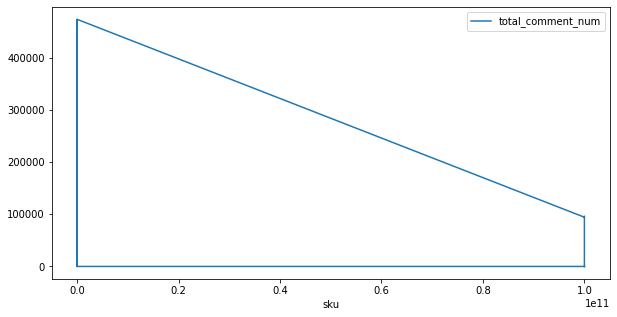

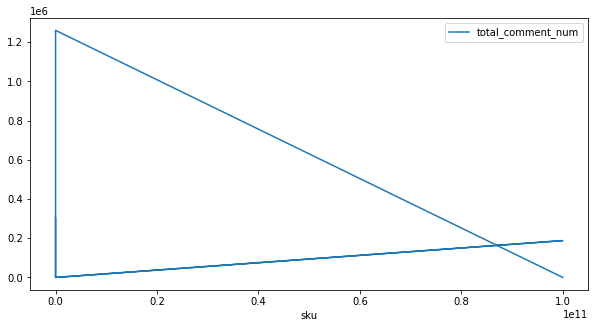

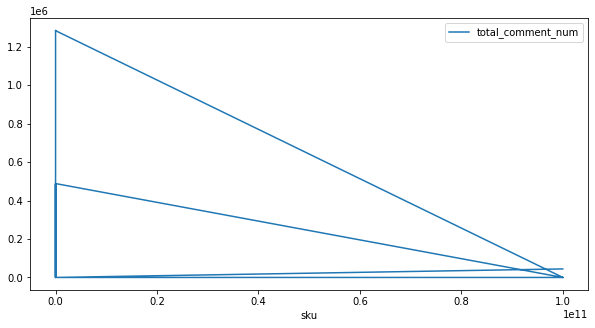

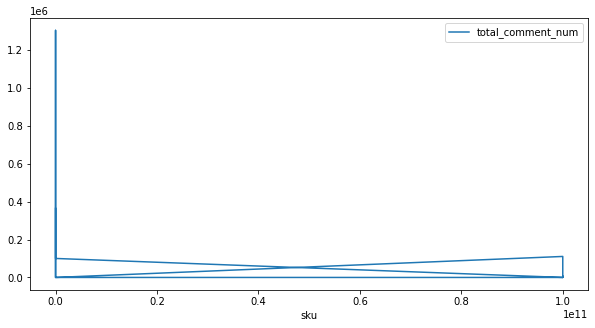

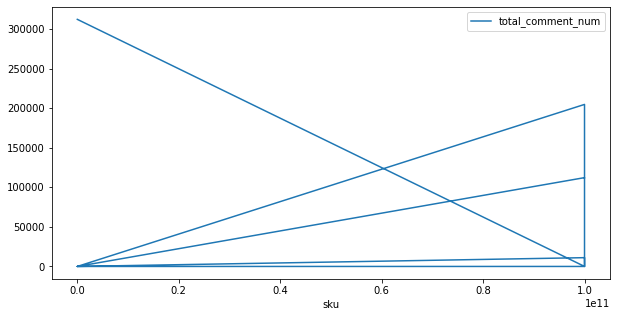

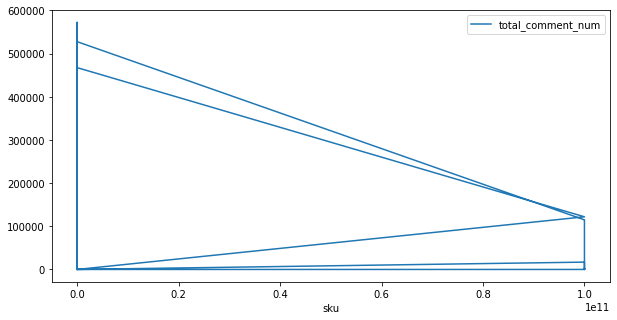

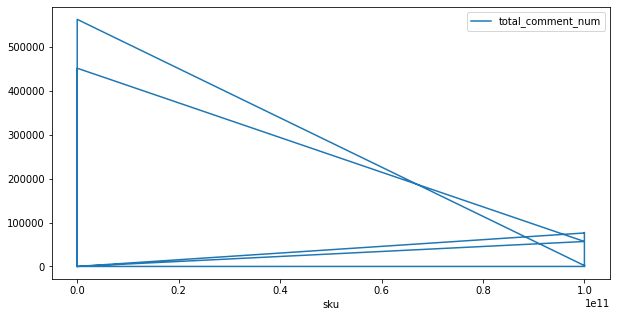

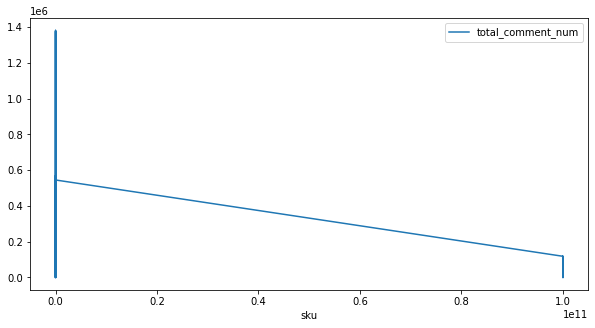

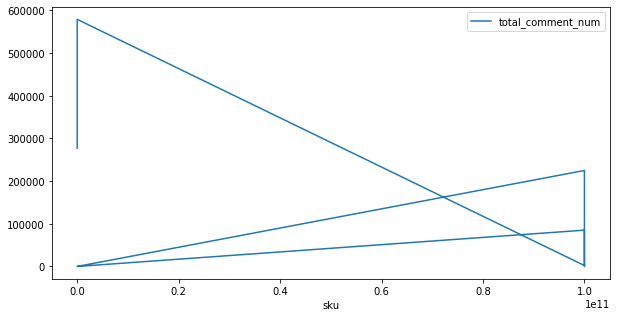

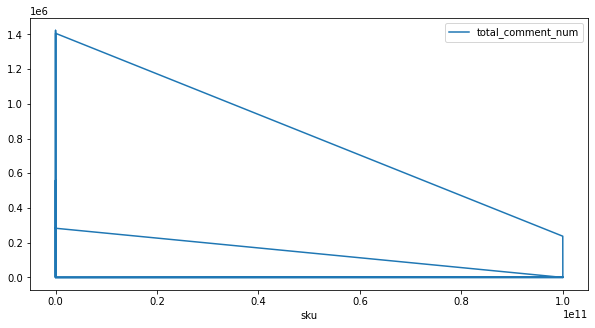

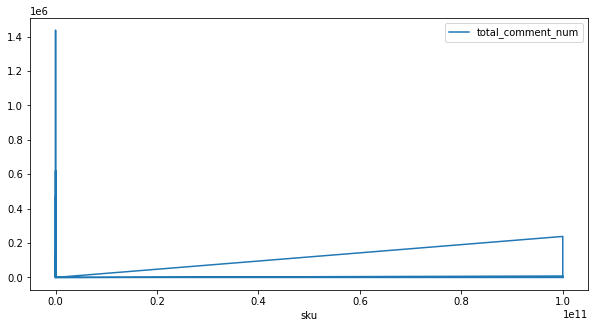

In [ ]:
df_m3.plot(x="sku", y=["total_comment_num"],
        kind="line", figsize=(10, 5))
plt.show()

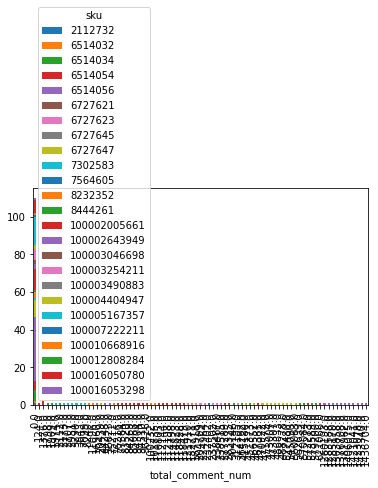

In [ ]:
df_m2.groupby(['total_comment_num','sku']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df_m4 = df_m2.sort_values(['date_key'],ascending=True).groupby('sku').head(3)
df_m4

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
1616781,6727647,美素佳儿（Friso）儿童配方奶粉 4段（3岁以上至6岁适用）1200克（荷兰原装进口）,415180.0,2020-07-01,2020-01-01,美素佳儿（Friso）,788,1431
2846076,6514056,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（荷兰原装进口）,0.0,2020-07-03,2020-01-01,美素佳儿（Friso）,845,4083
43656,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,1974.0,2020-07-04,2020-01-01,美素佳儿（Friso）,30,88
2730051,6514056,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（荷兰原装进口）,0.0,2020-07-09,2020-01-01,美素佳儿（Friso）,845,4083
7644498,6514054,美素佳儿（Friso）较大婴儿配方奶粉 2段（6-12个月婴幼儿适用）900克（荷兰原装进口）,467381.0,2020-07-10,2020-01-01,美素佳儿（Friso）,766,1885
3078126,6514056,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（荷兰原装进口）,0.0,2020-07-15,2020-01-01,美素佳儿（Friso）,845,4083
4238945,100003254211,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）2400克 京东专享装（荷兰原装进口）,121910.0,2020-07-16,2020-01-01,美素佳儿（Friso）,773,1579
218280,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,2173.0,2020-07-17,2020-01-01,美素佳儿（Friso）,30,88
65484,100005167357,美素佳儿（Friso）儿童配方奶粉 （调制乳粉）4段试吃包 40克*6,0.0,2020-07-23,2020-01-01,美素佳儿（Friso）,30,88
12142195,100003490883,美素佳儿(Friso) 成长配方奶粉 3段(1-3岁) 800g/罐 港版皇家 荷兰原装进口,16960.0,2020-07-25,2020-06-18,美素佳儿（Friso）,1747,1908


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

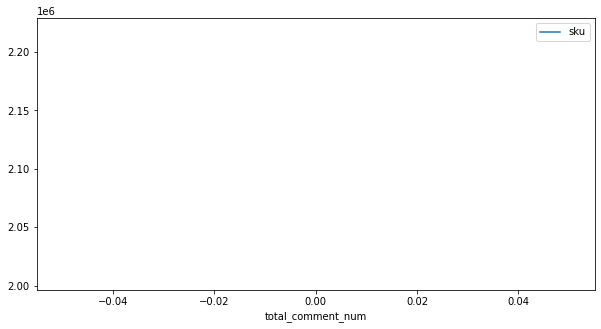

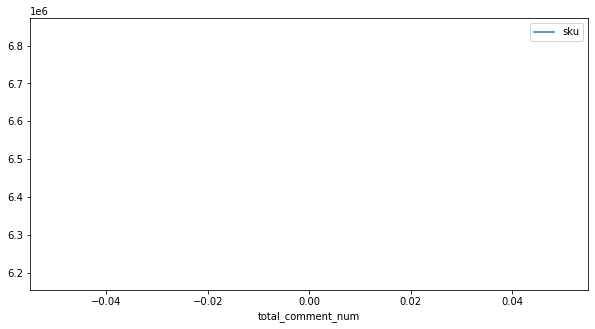

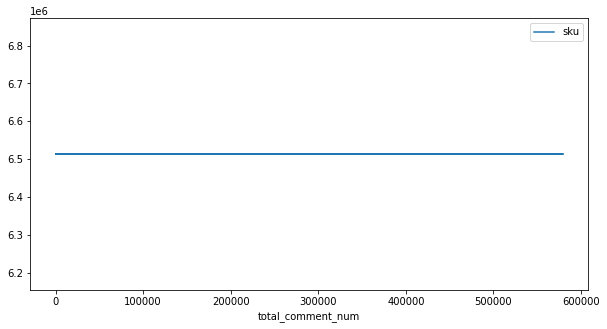

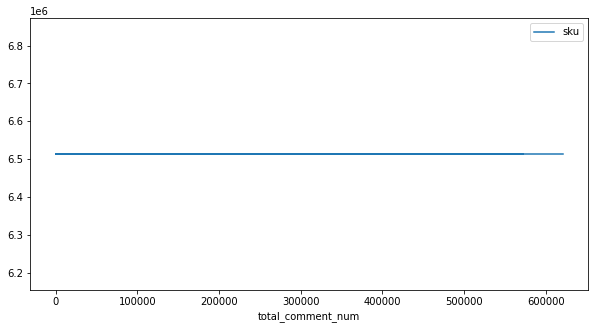

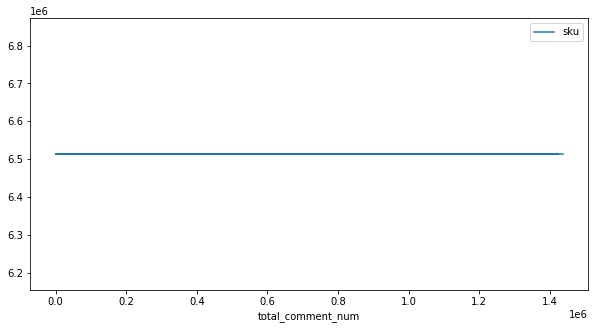

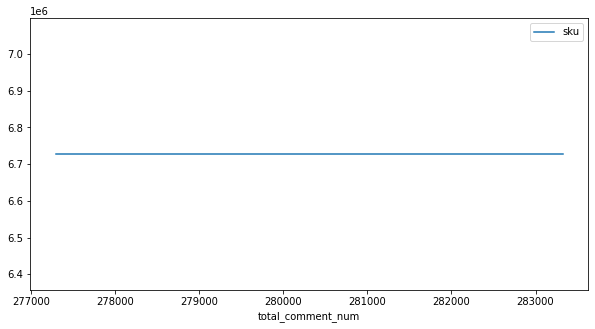

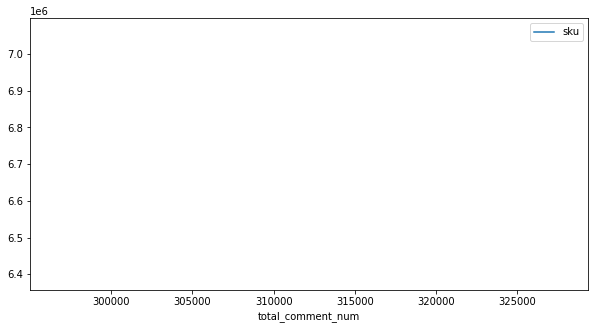

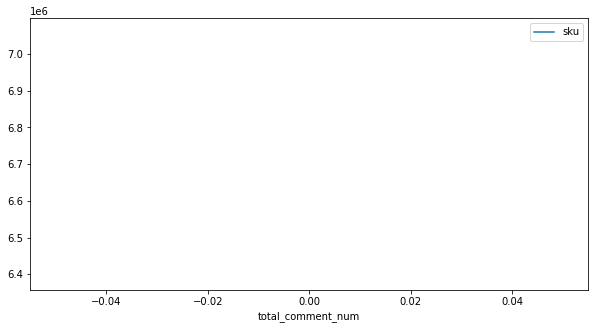

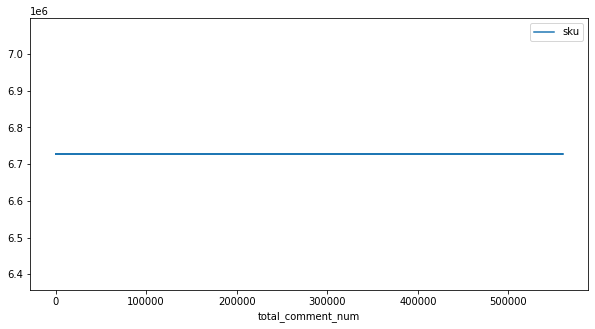

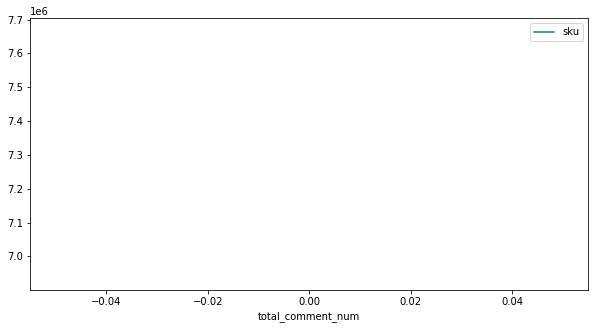

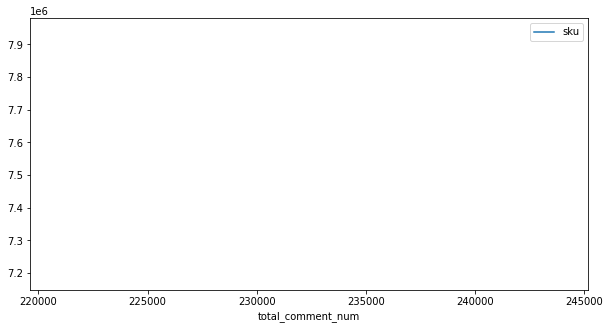

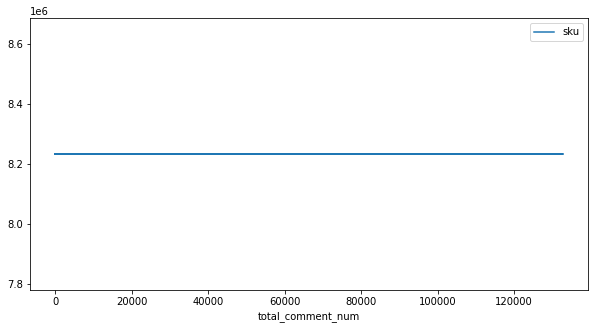

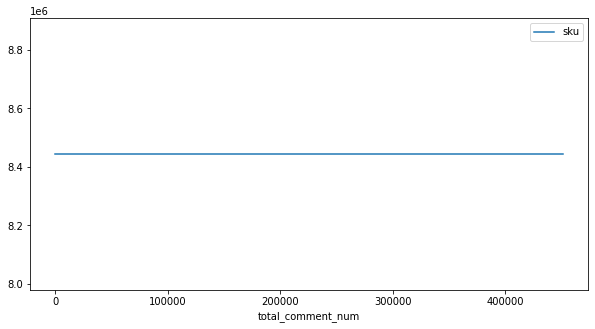

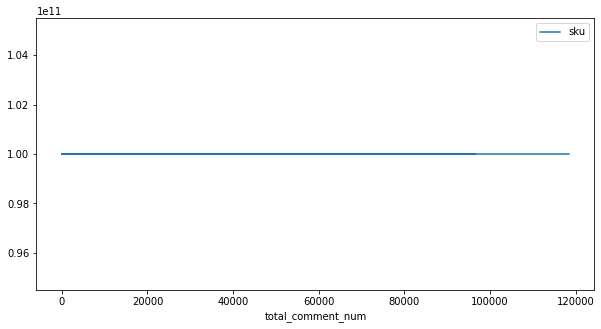

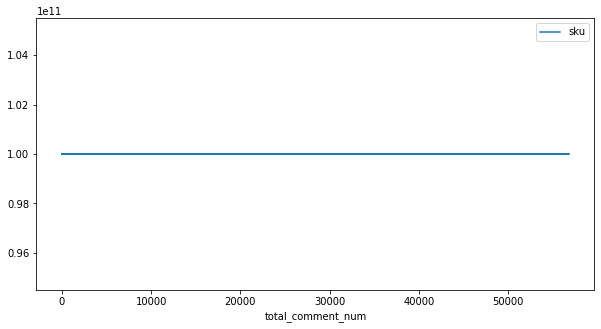

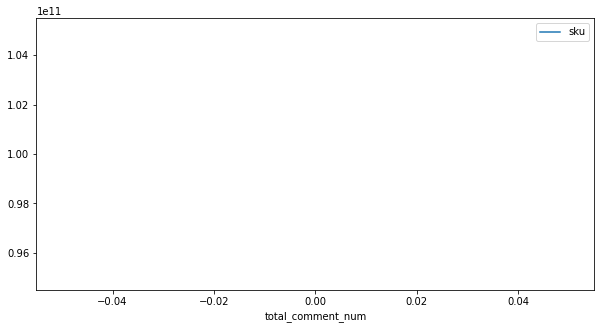

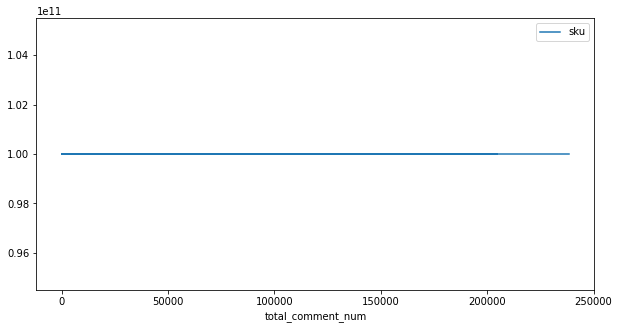

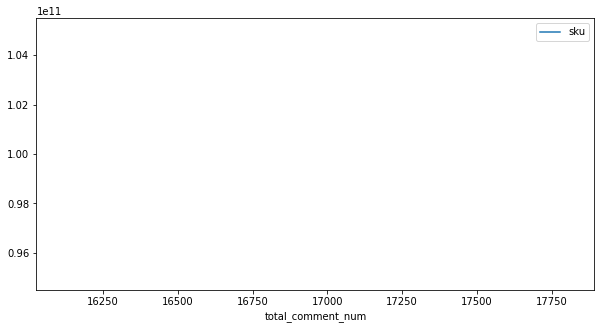

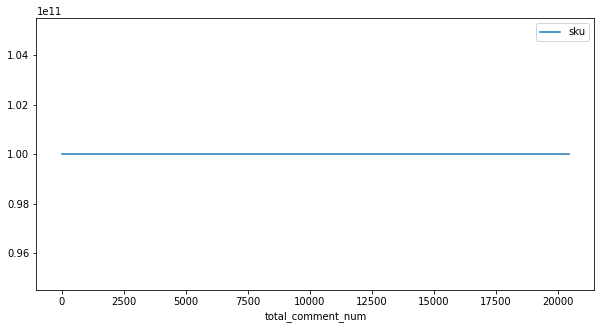

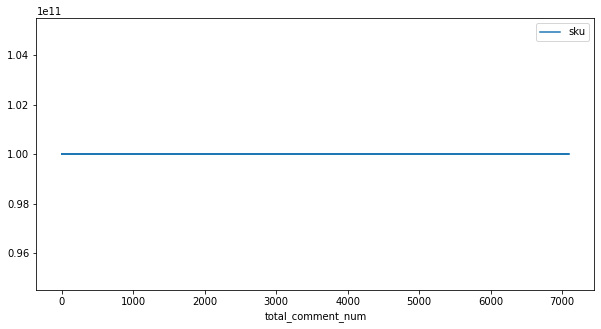

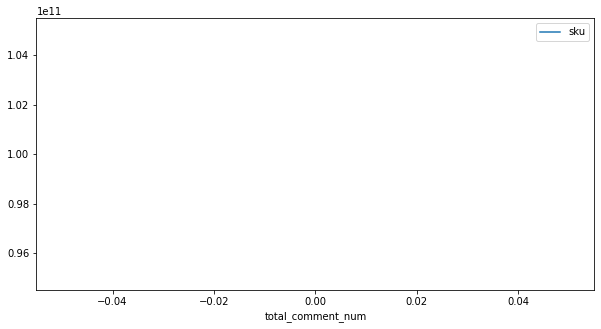

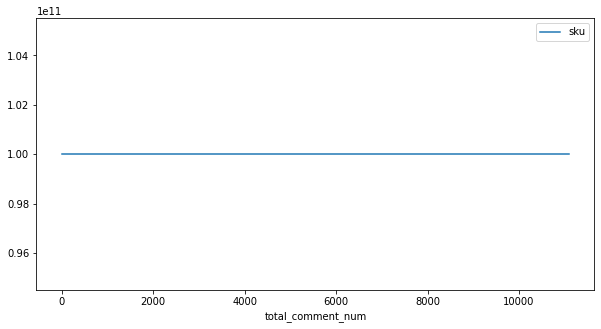

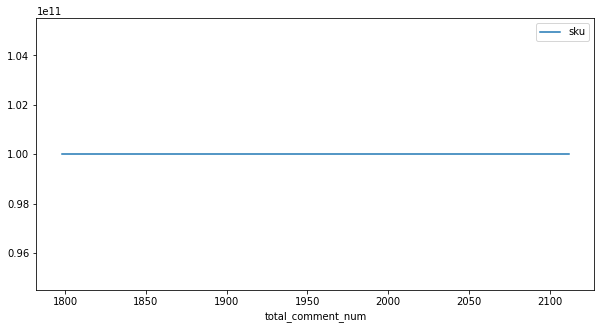

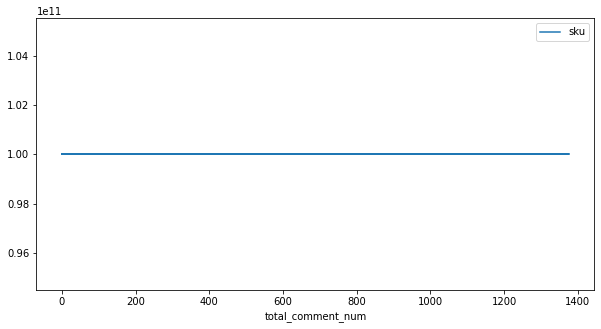

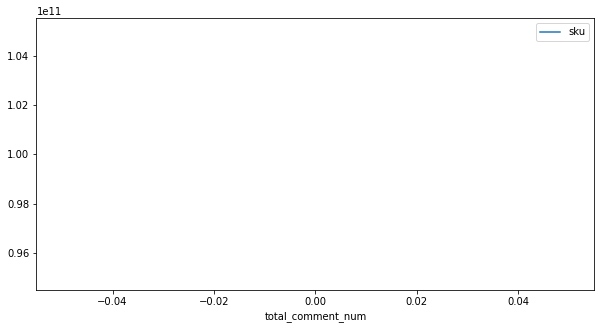

In [ ]:
df_m4.plot(x="total_comment_num", y=["sku"],
        kind="line", figsize=(10, 5))
plt.show()

In [ ]:
df_test = df_m4.loc[dfx['sku'] == 6727647]
# df_test = df_test.sort_values(by='date_key')
df_test

# 2

In [ ]:
df_m = pd.merge(dfx_nocom, dfy)
df_m.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
1,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
2,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
3,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205
4,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,NaN,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205


In [ ]:
df_m = df_m.drop(['monthly_sales_qty', 'total_sales_qty'], axis=1)
df_m.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
1,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
2,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
3,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205
4,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205


In [ ]:
df_m2 = df_m.drop_duplicates(subset='deal_num', keep="first")
df_m2.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
3,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205
30,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-02,美素佳儿（Friso）,292,600
52,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-02,美素佳儿（Friso）,291,600
90,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-04,美素佳儿（Friso）,311,579


In [ ]:
df_m2.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
3,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,62,205
30,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-02,美素佳儿（Friso）,292,600
52,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-02,美素佳儿（Friso）,291,600
90,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-04,美素佳儿（Friso）,311,579


In [ ]:
df_m3 = df_m.drop_duplicates(subset='date_time', keep="first")
df_m3.head()

,sku,product_name,total_comment_num,date_key,date_time,brand,deal_num,to_cart_num
0,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-01,美素佳儿（Friso）,61,205
30,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-02,美素佳儿（Friso）,292,600
60,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-03,美素佳儿（Friso）,292,535
90,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-04,美素佳儿（Friso）,311,579
120,100002005661,美素佳儿（Friso）幼儿配方奶粉 3段试吃包 33克*3,NaN,2020-09-17,2020-01-05,美素佳儿（Friso）,300,602


In [ ]:
def monthly_sales(data):
  monthly_data = data.copy()
  monthly_data.date_time = monthly_data.date_time.apply(lambda x: str(x)[:-3])
  monthly_data = monthly_data.groupby('date_time')['deal_num'].sum().reset_index()
  monthly_data.date_time = pd.to_datetime(monthly_data.date_time)
  return monthly_data

In [ ]:
monthly_df = monthly_sales(df_m3)
monthly_df.head()

,date_time,deal_num
0,2020-01-01,61
1,2020-01-02,292
2,2020-01-03,292
3,2020-01-04,311
4,2020-01-05,300


In [ ]:
def sales_duration(data):
  data.date_time = pd.to_datetime(data.date_time)
  number_of_days = data.date_time.max() - data.date_time.min()
  number_of_years = number_of_days.days / 365
  print(number_of_days.days, 'days')
  print(number_of_years, 'years')

sales_duration(dfy)

781 days
2.1397260273972605 years


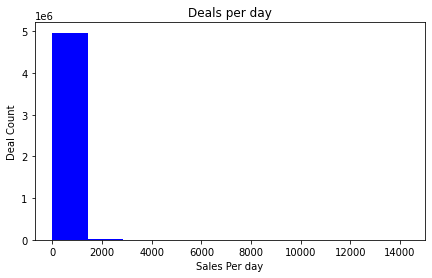

In [ ]:
def plot_deals_per_day(data):
  fig, ax = plt.subplots(figsize=(7, 4))
  plt.hist(data.deal_num, color='blue')

  ax.set(xlabel = "Deals Per day", ylabel = 'Count', title='Deals per day')

plot_deals_per_day(dfy)

In [ ]:
print(dfy.date_time.max())
print(dfy.date_time.min())

2022-02-20 00:00:00
2020-01-01 00:00:00


# 3.

In [ ]:
unique_skus = dfx['sku'].unique().tolist()
print(len(unique_skus))

106323


In [ ]:
unique_skus[0]

100021558806

In [ ]:
skus_with_no_comment = []
total_rows_with_this_sku = []
rows_with_no_comment_under_this_sku = []
percentage_of_no_comment = []

In [ ]:
df1 = dfx.loc[dfx['sku'] == unique_skus[0]].sort_values('date_key')
df1

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,2021-10-05
247747,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,NaN,2021-10-18
490602,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,11.0,2021-10-26
1014926,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,14.0,2021-11-02
938682,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,27.0,2021-12-14
169594,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,NaN,2021-12-21


In [ ]:
df1['total_comment_num'].isna().sum()

2

In [ ]:
skus_with_no_comment = []
total_rows_with_this_sku = []
rows_with_no_comment_under_this_sku = []
rows_with_comments_under_this_sku = []
percentage_of_no_comment = []
highest_date_with_this_sku = []
lowest_date_with_this_sku = []
max_date_with_nocom = []
min_date_with_nocom = [] 

In [ ]:
def create_dataframe():

  df1 = pd.DataFrame(list(zip(skus_with_no_comment, total_rows_with_this_sku, rows_with_no_comment_under_this_sku, 
                              rows_with_comments_under_this_sku, percentage_of_no_comment, highest_date_with_this_sku, lowest_date_with_this_sku, 
                              max_date_with_nocom, min_date_with_nocom)), 
                     columns = ["skus_with_no_comment", "total_rows", "rows_with_no_comment", 
                                "rows_with_comments", "no_comment_percentage", "highest_date", "lowest_date", "max_date_with_nocom", "min_date_with_nocom"])

  return df1



def find_data(sku, df):

  exist_count = skus_with_no_comment.count(sku)
  if exist_count > 0:
    skus_with_no_comment.clear()
    total_rows_with_this_sku.clear()
    rows_with_no_comment_under_this_sku.clear()
    rows_with_comments_under_this_sku.clear()
    percentage_of_no_comment.clear()
    highest_date_with_this_sku.clear()
    lowest_date_with_this_sku.clear()
    max_date_with_nocom.clear()
    min_date_with_nocom.clear()

  df_n = df.loc[df['sku'] == sku].sort_values('date_key')
  
  if df_n['total_comment_num'].isnull().values.any():
    skus_with_no_comment.append(sku)
    total_rows_with_this_sku.append(len(df_n))
    rows_with_no_comment_under_this_sku.append(df_n['total_comment_num'].isna().sum())
    rows_with_comments_under_this_sku.append(len(df_n) - df_n['total_comment_num'].isna().sum())
    percentage_of_no_comment.append((df_n['total_comment_num'].isna().sum() / len(df_n)) * 100)
    highest_date_with_this_sku.append(df_n.loc[dfx['sku'] == sku, 'date_key'].max().date())
    lowest_date_with_this_sku.append(df_n.loc[dfx['sku'] == sku, 'date_key'].min().date())
    max_date_with_nocom.append(df_n.loc[(dfx['sku'] == sku) & (dfx['total_comment_num'].isna()),  'date_key'].max().date())
    min_date_with_nocom.append(df_n.loc[(dfx['sku'] == sku) & (dfx['total_comment_num'].isna()),  'date_key'].min().date())
  

  return create_dataframe()

In [ ]:
for s in unique_skus[:10]:
  df_try = find_data(s, dfx)
  
df_try

,skus_with_no_comment,total_rows,rows_with_no_comment,rows_with_comments,no_comment_percentage,highest_date,lowest_date,max_date_with_nocom,min_date_with_nocom
0,100021558806,6,2,4,33.333333,2021-12-21,2021-10-05,2021-12-21,2021-10-18
1,10022644635456,29,17,12,58.620690,2021-08-31,2020-10-24,2021-07-16,2020-10-24
2,10030902240475,6,3,3,50.000000,2021-05-22,2021-05-15,2021-05-21,2021-05-15
3,43541408544,20,9,11,45.000000,2021-12-12,2020-12-04,2021-12-12,2020-12-04
4,55514902865,49,35,14,71.428571,2021-12-12,2020-07-02,2021-12-12,2020-07-02
5,56357165862,34,22,12,64.705882,2021-08-03,2020-07-04,2021-07-30,2020-07-15
6,70179074889,30,24,6,80.000000,2021-07-30,2020-07-03,2021-07-30,2020-07-03
7,7425800,48,28,20,58.333333,2021-12-31,2020-07-24,2021-12-31,2020-07-24
8,100002755391,39,20,19,51.282051,2021-12-31,2020-07-17,2021-12-31,2020-07-23
9,100015758284,43,26,17,60.465116,2021-12-26,2020-10-20,2021-12-12,2020-10-20


Need to check with an SKU that has no NaN value in total_comment_num

In [ ]:
test = dfx.loc[(dfx['sku'] == 100021558806) & (dfx['total_comment_num'].isna()),  'date_key'].max().date()
print(test)
print(type(test))

2021-12-21
<class 'datetime.date'>
